In [2]:
import os

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import numpy as np
import pandas as pd

In [44]:
from settings import PATH, DATABASE_PATH

csv = "penguins_size.csv"

In [45]:
df = pd.read_csv(os.path.join(DATABASE_PATH, csv))
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [70]:
df.replace('.', float('NAN'), inplace=True)
df = df.dropna(how="all")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [83]:
df.count()

species              334
island               334
culmen_length_mm     334
culmen_depth_mm      334
flipper_length_mm    334
body_mass_g          334
sex                  333
dtype: int64

In [71]:
df.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,334,334,334.000000,334.000000,334.000000,334.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,146,164,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.994311,17.160479,201.014970,4209.056886,NaN
std,NaN,NaN,5.460521,1.967909,14.022175,804.836129,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.575000,18.700000,213.000000,4793.750000,NaN


In [72]:
#study_name = df.studyName
#sample_number = df.Sample_Number
species = df.species
#region = df.Region
island = df.island
#stage = df.Stage
sex = df.sex
body_mass_g = df.body_mass_g

In [78]:
sex.unique()

array(['MALE', 'FEMALE', nan], dtype=object)

In [80]:
island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [81]:
species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

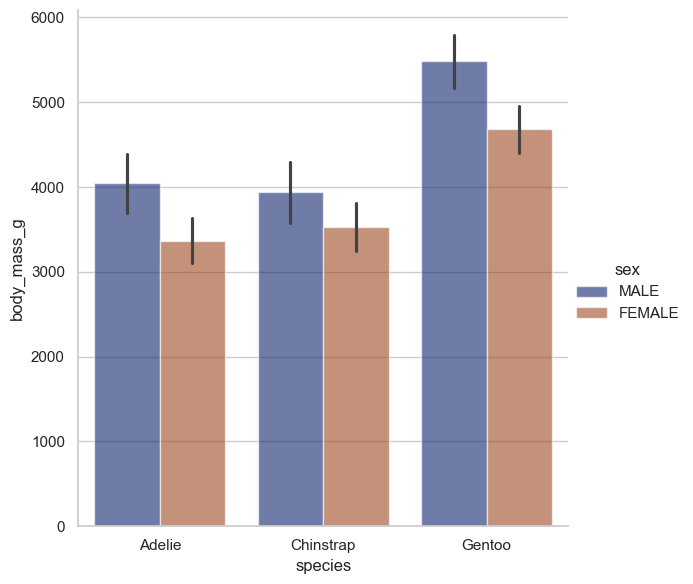

In [76]:
sns.catplot(kind="bar", x=species, y=body_mass_g, hue=sex, errorbar="sd", palette="dark", alpha=.6, height=6)

In [84]:
sns.displot( x=flipper_length_mm, col=species, row=sex, binwidth=3, height=3, facet_kws=dict(margin_titles=True),)

NameError: name 'flipper_length_mm' is not defined